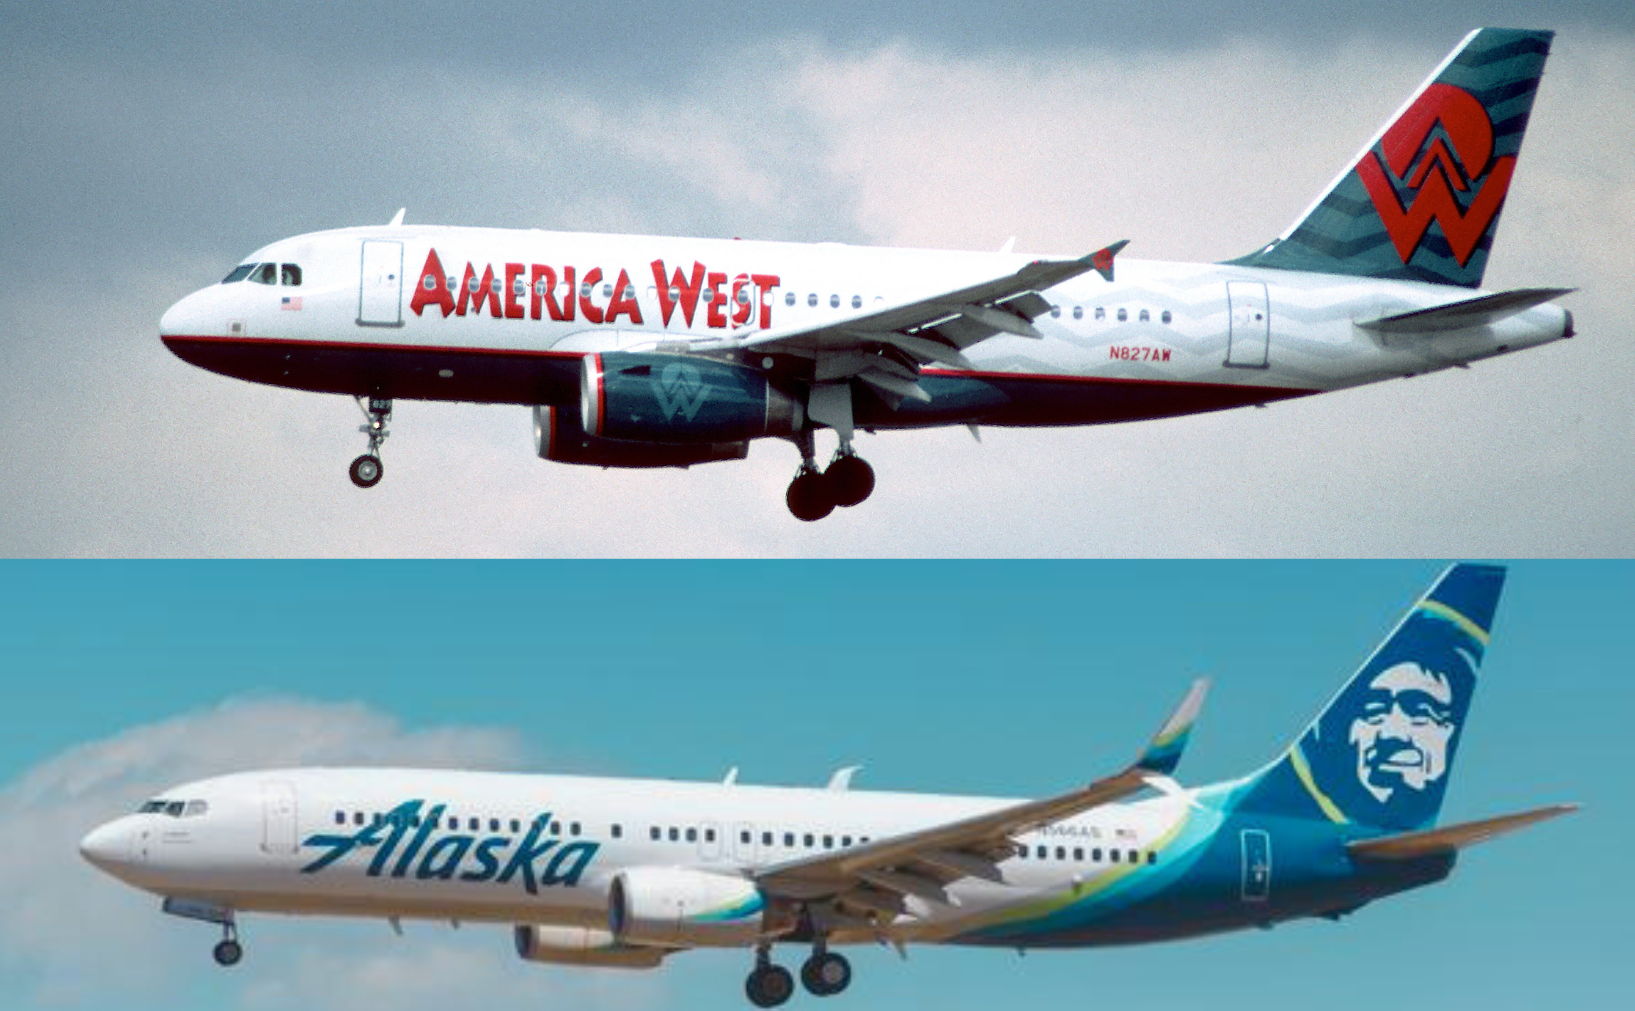

In [20]:
from IPython.display import Image

# Use the path to your image
Image(filename='Alaska_AW.png')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import FileLink

# Creating the flight delay data as a dictionary
data = {
    "Airline": ["ALASKA", "ALASKA", "AM WEST", "AM WEST"],
    "Status": ["On Time", "Delayed", "On Time", "Delayed"],
    "Los Angeles": [497, 62, 694, 117],
    "Phoenix": [221, 12, 4840, 415],
    "San Diego": [212, 20, 383, 65],
    "San Francisco": [503, 102, 320, 129],
    "Seattle": [1841, 305, 201, 61]
}

# Creating a DataFrame
df = pd.DataFrame(data)

# Saving the data as a CSV file
csv_filename = "flight_delays.csv"
df.to_csv(csv_filename, index=False)

# Reading the data back from CSV
df_loaded = pd.read_csv(csv_filename)

# Display the loaded DataFrame
print(df_loaded)




   Airline   Status  Los Angeles  Phoenix  San Diego  San Francisco  Seattle
0   ALASKA  On Time          497      221        212            503     1841
1   ALASKA  Delayed           62       12         20            102      305
2  AM WEST  On Time          694     4840        383            320      201
3  AM WEST  Delayed          117      415         65            129       61


/Users/apokharel/Downloads/flight_delays.csv

In [23]:
#To Downlaod
FileLink(csv_filename)

/Users/apokharel/Downloads/flight_delays.csv

In [24]:
# Grouping by airline and status to compare on-time vs delayed flights
summary = df.groupby(["Airline", "Status"]).sum(numeric_only=True)
print("\nGrouped Summary by Airline and Status:")
print(summary)




Grouped Summary by Airline and Status:
                 Los Angeles  Phoenix  San Diego  San Francisco  Seattle
Airline Status                                                          
ALASKA  Delayed           62       12         20            102      305
        On Time          497      221        212            503     1841
AM WEST Delayed          117      415         65            129       61
        On Time          694     4840        383            320      201


In [25]:
# Calculating the percentage of delayed flights per airline
delayed_flights = df[df["Status"] == "Delayed"].groupby("Airline").sum(numeric_only=True)
on_time_flights = df[df["Status"] == "On Time"].groupby("Airline").sum(numeric_only=True)

delay_percentage = (delayed_flights / (delayed_flights + on_time_flights)) * 100
print("\nPercentage of Delayed Flights by Airline:")
print(delay_percentage)


Percentage of Delayed Flights by Airline:
         Los Angeles   Phoenix  San Diego  San Francisco    Seattle
Airline                                                            
ALASKA     11.091234  5.150215   8.620690      16.859504  14.212488
AM WEST    14.426634  7.897241  14.508929      28.730512  23.282443


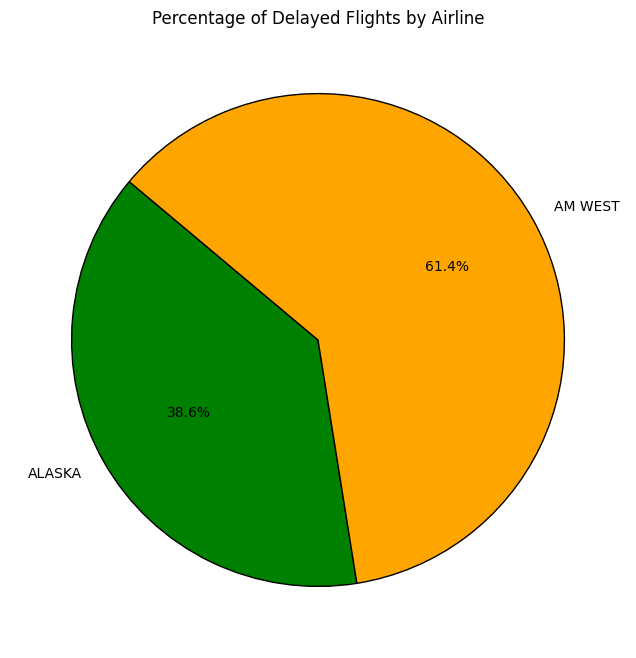

In [26]:
# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    delay_percentage.sum(axis=1),  # Summing across all destinations
    labels=delay_percentage.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=["green", "orange"],
    wedgeprops={"edgecolor": "black"}
)

plt.title("Percentage of Delayed Flights by Airline")
plt.show()

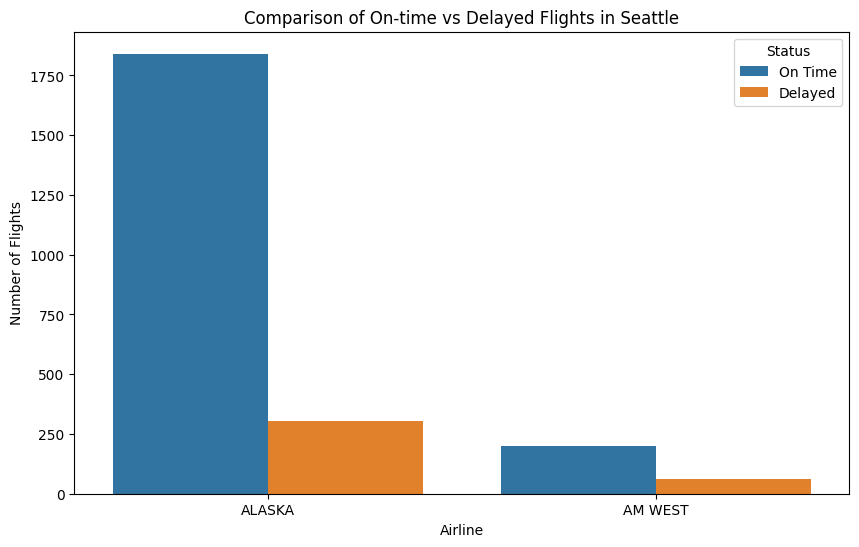

In [13]:
# Visualizing the delays
plt.figure(figsize=(10, 6))
sns.barplot(x="Airline", y="Seattle", hue="Status", data=df)
plt.title("Comparison of On-time vs Delayed Flights in Seattle")
plt.ylabel("Number of Flights")
plt.show()